# Classificação de Notícias Usando Redes Neurais Recorrentes (LSTM)

## Setup

In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras import layers, callbacks
import tensorflow as tf

## Carregamento dos Dados

In [8]:
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=vocab_size)
print(f'Formato do conjunto de treinamento: {x_train.shape}')
print(f'Formato do conjunto de teste: {x_test.shape}')

num_classes = np.max(y_train) + 1
print(f'Número de classes: {num_classes}')

Formato do conjunto de treinamento: (8982,)
Formato do conjunto de teste: (2246,)
Número de classes: 46


## Pré-Processamento: Transformação

In [9]:
max_len = 200

# pad sequences to the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print(f'Formato do conjunto de treinamento: {x_train.shape}')
print(f'Formato do conjunto de teste: {x_test.shape}')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('O dataset já vem indexado e portanto não será necessário realizar o label encoding.')

Formato do conjunto de treinamento: (8982, 200)
Formato do conjunto de teste: (2246, 200)
O dataset já vem indexado e portanto não será necessário realizar o label encoding.


## Topologia da Rede LSTM

In [10]:
lstm = keras.Sequential(
    [
        layers.Embedding(input_dim=vocab_size, output_dim=128),
        layers.Bidirectional(layers.LSTM(units=128, return_sequences=True, dropout=0.5, kernel_regularizer=keras.regularizers.l2(0.0001))),
        layers.GlobalMaxPooling1D(),
        layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        layers.Dropout(0.5),
        layers.Dense(units=256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
        layers.Dropout(0.5),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compilação da LSTM

In [11]:
lstm.compile(optimizer=keras.optimizers.Adam(),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=[keras.metrics.CategoricalAccuracy(name='acc')])

## Treinamento da LSTM

In [12]:
earlyStopping = callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = lstm.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, callbacks=[earlyStopping])

test_loss, test_acc = lstm.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 42s 157ms/step - acc: 0.4851 - loss: 2.1008 - val_acc: 0.5806 - val_loss: 1.7099
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 45s 177ms/step - acc: 0.5951 - loss: 1.6040 - val_acc: 0.6229 - val_loss: 1.5401
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 92s 362ms/step - acc: 0.6663 - loss: 1.3535 - val_acc: 0.6796 - val_loss: 1.4374
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 81s 320ms/step - acc: 0.7208 - loss: 1.1469 - val_acc: 0.6908 - val_loss: 1.4193
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 99s 391ms/step - acc: 0.7502 - loss: 1.0312 - val_acc: 0.6774 - val_loss: 1.3711
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 108s 426ms/step - acc: 0.7738 - loss: 0.9305 - val_acc: 0.6919 - val_loss: 1.4115
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 157s 485ms/step - acc: 0.8022 - loss: 0.8269 - val_acc: 0.7130 - val_loss: 1.4562
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 128s 506ms/step - acc: 0.8211 - loss: 0.7473 - val_acc: 0.7164 - val_loss: 1.3334
Epoch 9/10
253/253 ━━━━━━━━━━

## Avaliação de Resultados

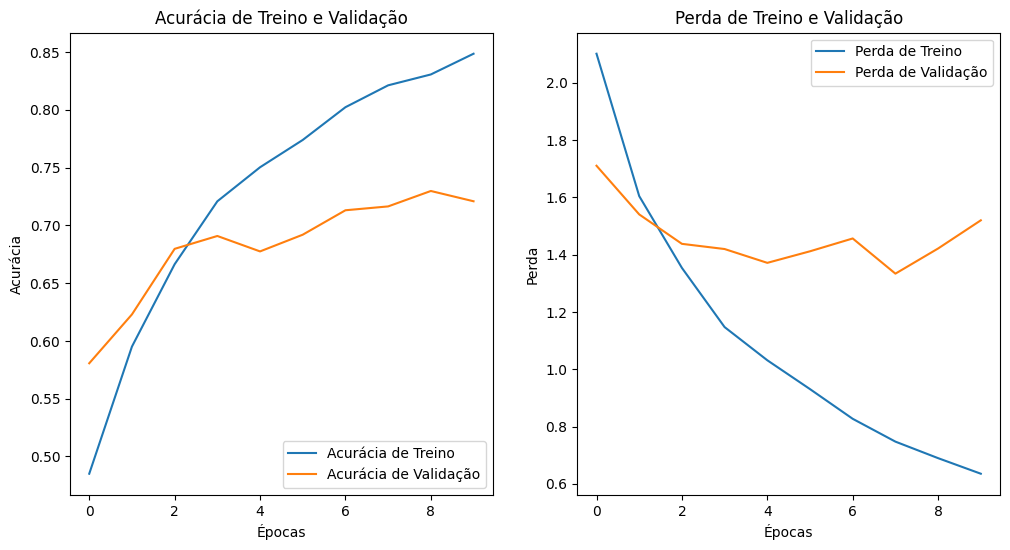

In [13]:
# Resgatar o histórico de acurácia e perda
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Criar a figura com os dois gráficos
plt.figure(figsize=(12, 6))

# Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


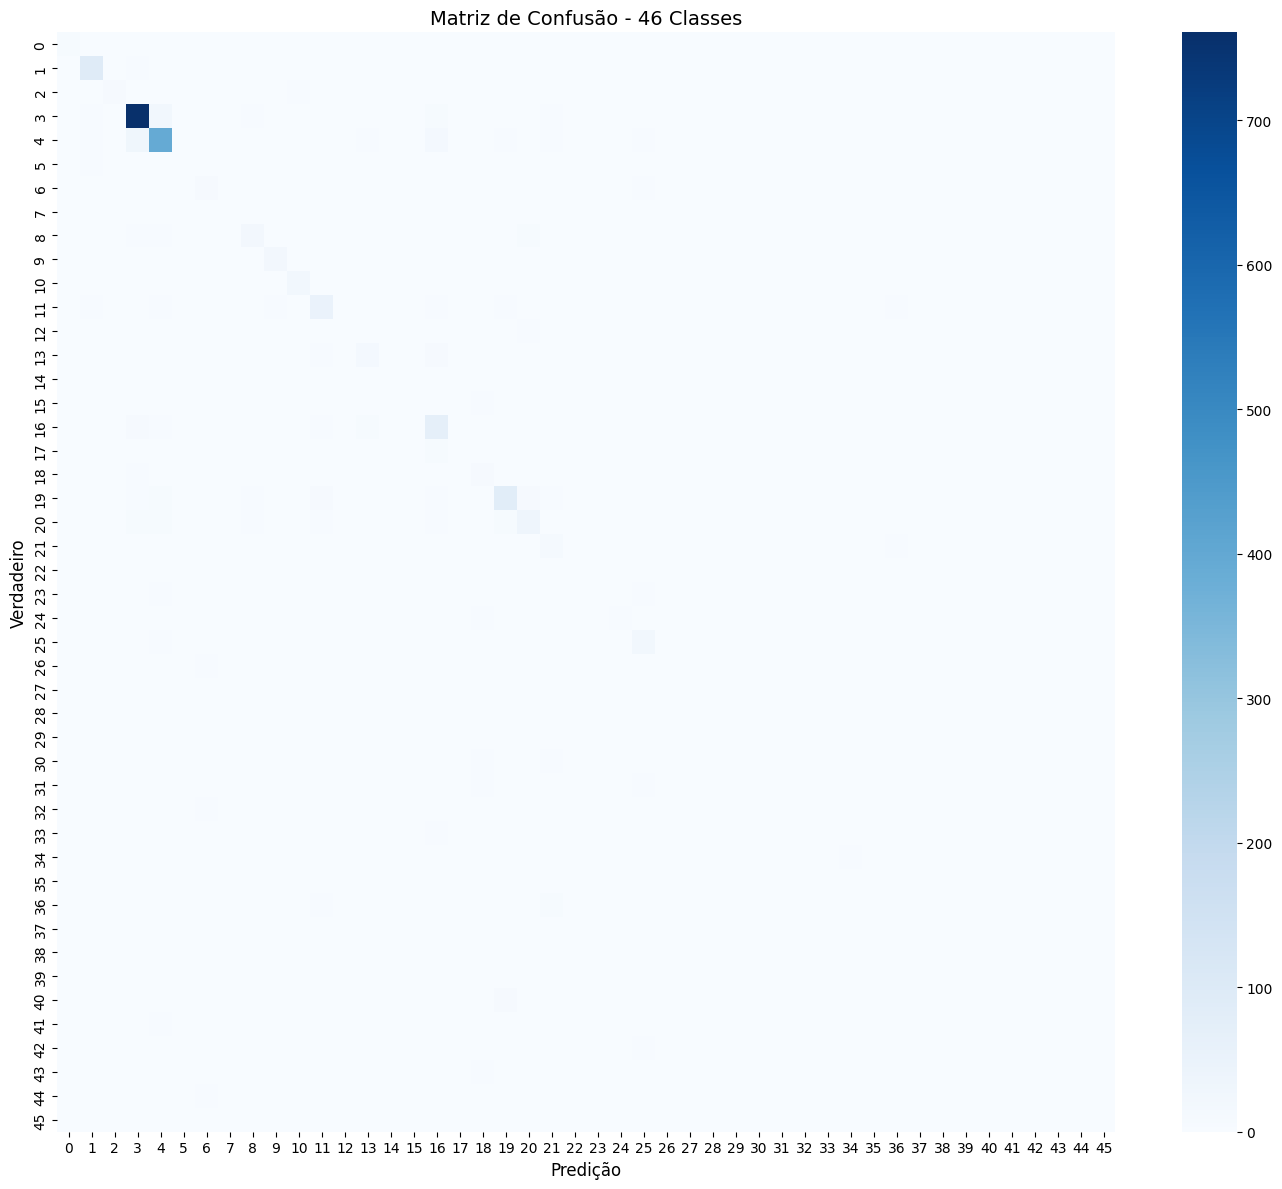

Top 10 maiores erros de classificação:
Classe 4 confundida com 3: 31 vezes
Classe 3 confundida com 4: 24 vezes
Classe 4 confundida com 16: 17 vezes
Classe 13 confundida com 16: 11 vezes
Classe 16 confundida com 3: 11 vezes
Classe 19 confundida com 20: 10 vezes
Classe 19 confundida com 11: 9 vezes
Classe 40 confundida com 19: 9 vezes
Classe 19 confundida com 4: 8 vezes
Classe 20 confundida com 3: 8 vezes


In [15]:
# 1. Gerar as previsões do modelo no conjunto de teste
predictions = lstm.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# 2. Obter os rótulos verdadeiros (converter de one-hot para número da classe)
true_labels = np.argmax(y_test, axis=1)

# 3. Calcular a matriz de confusão
cm = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# 4. Plotar a matriz de confusão de forma visual
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True)  # annot=False pois 46 classes é muito
plt.xlabel('Predição', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.title(f'Matriz de Confusão - {num_classes} Classes', fontsize=14)
plt.tight_layout()
plt.show()

# Opcional: Mostrar classes mais confundidas
print("Top 10 maiores erros de classificação:")
cm_array = cm.numpy()
np.fill_diagonal(cm_array, 0)  # Ignorar acertos (diagonal)
errors = []
for i in range(num_classes):
    for j in range(num_classes):
        if cm_array[i, j] > 0:
            errors.append((i, j, cm_array[i, j]))
errors.sort(key=lambda x: x[2], reverse=True)
for true_class, pred_class, count in errors[:10]:
    print(f"Classe {true_class} confundida com {pred_class}: {count} vezes")